<pre>
-----------------------------------------
<strong>A1 Classification Analysis</strong>
<strong>Machine Learning - DAT-5303 - VMsBA1</strong>
----------------------------------------

Carolina Játiva
January 25, 2021
<pre>

<pre>

The objective of the following report is to identify the customers that will likely subscribe to the Cross Sell Success promotion strategy called "Halfway There". 

The analysis uses different machine learning techniques that allow us to obtain the best model for this case.
</pre>

<pre>
<strong>Libraries & Packages</strong>
</pre>

In [1]:
# importing libraries
import random            as rand                     # random number gen
import pandas            as pd                       # data science essentials
import matplotlib.pyplot as plt                      # data visualization
import seaborn           as sns                      # enhanced data viz
import numpy as np                                   # mathematical essentials
from sklearn.linear_model import LinearRegression    # linear regression (scikit-learn)
import sklearn.linear_model                          # linear models
from sklearn.model_selection import train_test_split # train-test split
from sklearn.linear_model import LogisticRegression  # logistic regression
import statsmodels.formula.api as smf                # logistic regression
from sklearn.metrics import confusion_matrix         # confusion matrix
from sklearn.metrics import roc_auc_score            # auc score
from sklearn.neighbors import KNeighborsClassifier   # KNN for classification
from sklearn.neighbors import KNeighborsRegressor    # KNN for regression
from sklearn.preprocessing import StandardScaler     # standard scaler
from sklearn.tree import DecisionTreeClassifier      # classification trees
from sklearn.tree import export_graphviz             # exports graphics
from six import StringIO                             # saves objects in memory
from IPython.display import Image                    # displays on frontend
import pydotplus                                     # interprets dot objects
from sklearn.model_selection import RandomizedSearchCV     # hyperparameter tuning
from sklearn.metrics import make_scorer              # customizable scorer
from sklearn.ensemble import RandomForestClassifier     # random forest
from sklearn.ensemble import GradientBoostingClassifier # gbm

# setting pandas print options
pd.set_option('display.max_rows', 500)
pd.set_option('display.max_columns', 500)
pd.set_option('display.width', 1000)

# specifying file name
file = "./Apprentice_Chef_Dataset.xlsx"

# reading the file into Python
apprentice = pd.read_excel(io = file)

# checking the file
apprentice.head(n = 5)


,REVENUE,CROSS_SELL_SUCCESS,NAME,EMAIL,FIRST_NAME,FAMILY_NAME,TOTAL_MEALS_ORDERED,UNIQUE_MEALS_PURCH,CONTACTS_W_CUSTOMER_SERVICE,PRODUCT_CATEGORIES_VIEWED,AVG_TIME_PER_SITE_VISIT,MOBILE_NUMBER,CANCELLATIONS_BEFORE_NOON,CANCELLATIONS_AFTER_NOON,TASTES_AND_PREFERENCES,PC_LOGINS,MOBILE_LOGINS,WEEKLY_PLAN,EARLY_DELIVERIES,LATE_DELIVERIES,PACKAGE_LOCKER,REFRIGERATED_LOCKER,AVG_PREP_VID_TIME,LARGEST_ORDER_SIZE,MASTER_CLASSES_ATTENDED,MEDIAN_MEAL_RATING,AVG_CLICKS_PER_VISIT,TOTAL_PHOTOS_VIEWED
0,393.0,1,Saathos,saathos@unitedhealth.com,Saathos,Saathos,14,6,12,10,48.00,1,3,1,1,5,2,0,0,2,0,0,33.4,1,0,1,17,0
1,1365.0,1,Alysanne Osgrey,alysanne.osgrey@ge.org,Alysanne,Osgrey,87,3,8,8,40.35,1,0,0,1,5,1,12,0,2,0,0,84.8,1,0,3,13,170
2,800.0,1,Edwyd Fossoway,edwyd.fossoway@jnj.com,Edwyd,Fossoway,15,7,11,5,19.77,1,3,0,1,6,1,1,0,1,0,0,63.0,1,0,2,16,0
3,600.0,1,Eleyna Westerling,eleyna.westerling@ge.org,Eleyna,Westerling,13,6,11,5,90.00,1,2,0,1,6,1,14,0,3,0,0,43.8,1,0,2,14,0
4,1490.0,1,Elyn Norridge,elyn.norridge@jnj.com,Elyn,Norridge,47,8,6,10,40.38,1,0,0,0,5,1,5,0,8,0,0,84.8,1,1,3,12,205


<pre>
<strong>Data Preparation & Feature Engineering</strong>
</pre>

<pre>
Renaming variable 'LARGEST_ORDER_SIZE' to 'AVG_NUM_MEALS'
</pre>

In [2]:
# Rename LARGEST_ORDER_SIZE column
apprentice.rename(columns = {'LARGEST_ORDER_SIZE':'AVG_NUM_MEALS'}, inplace = True)

The first step taken was to prepare the data. For the variable 'EMAIL', we decided to split emails in order to categorize them based on the domain. The categories for the domains are: professional, personal and junk.

In [3]:
# Splitting emails

# placeholder list
placeholder_lst = []

# looping over each email address
for index, col in apprentice.iterrows():
    
    # splitting email domain at '@'
    split_email = apprentice.loc[index, 'EMAIL'].split(sep = '@')
    #print(split_email)
    
    # appending placeholder_lst with the results
    placeholder_lst.append(split_email)
    

# converting placeholder_lst into a DataFrame 
email_df = pd.DataFrame(placeholder_lst)


# displaying the results
email_df.columns = ['EMAIL_NAME', 'EMAIL_DOMAIN']

apprentice = pd.concat([apprentice, email_df['EMAIL_DOMAIN']], 
                       axis = 1)

In [4]:
# email domain types
professional_email_domains = ['@mmm.com', '@amex.com', '@apple.com', 
                            '@boeing.com', '@caterpillar.com', 
                            '@chevron.com','@cisco.com', '@cocacola.com', 
                            '@disney.com', '@dupont.com', '@exxon.com', 
                            '@ge.org', '@goldmansacs.com', '@homedepot.com', 
                            '@ibm.com', '@intel.com', '@jnj.com', 
                            '@jpmorgan.com', '@mcdonalds.com', '@merck.com', 
                            '@microsoft.com','@nike.com', '@pfizer.com', 
                            '@pg.com', '@travelers.com', '@unitedtech.com', 
                            '@unitedhealth.com', '@verizon.com', '@visa.com', 
                            '@walmart.com']

personal_email_domains = ['@gmail.com', '@yahoo.com', '@protonmail.com']

junk_email_domains = ['@me.com', '@aol.com', '@hotmail.com', '@live.com', 
                      '@msn.com', '@passport.com']


# placeholder list
placeholder_lst = []

# looping to group observations by domain type
for domain in apprentice['EMAIL_DOMAIN']:
        if '@' + domain in professional_email_domains:
            placeholder_lst.append('PROFESSIONAL')
            
        elif '@' + domain in personal_email_domains:
            placeholder_lst.append('PERSONAL')
        
        elif '@' + domain in junk_email_domains:
            placeholder_lst.append('JUNK')
            
        else:
            print('Unknown')


# concatenating with original DataFrame
apprentice['DOMAIN_GROUP'] = pd.Series(placeholder_lst)  ## a series is a column in a dataframe


# checking results
apprentice['DOMAIN_GROUP'].value_counts()

PERSONAL        861
PROFESSIONAL    696
JUNK            389
Name: DOMAIN_GROUP, dtype: int64

In [5]:
# one hot encoding categorical variables
one_hot_email = pd.get_dummies(apprentice['DOMAIN_GROUP'])

# dropping categorical variables after they've been encoded
apprentice = apprentice.drop(['DOMAIN_GROUP', 'EMAIL', 'EMAIL_DOMAIN'], axis = 1)

# Joining the two df together
apprentice = apprentice.join([one_hot_email])


<pre>
Based on the results from the models, some new variables were feature engineered considering that they could provide some extra hints to the model. 
</pre>

In [6]:
#Total cancellations
apprentice['TOTAL_CANCELLATIONS'] = apprentice['CANCELLATIONS_BEFORE_NOON'] + apprentice['CANCELLATIONS_AFTER_NOON']

# Feature Engineering for Early Deliveries
apprentice['bin_EARLY_DELIVERIES'] = np.where(apprentice.EARLY_DELIVERIES > 0,1,0)

# Feature Engineering for Late Deliveries
apprentice['bin_LATE_DELIVERIES'] = np.where(apprentice.LATE_DELIVERIES > 0,1,0)

# Feature Engineering for Cancellations after noon
apprentice['bin_CANCELLATIONS_AFTER_NOON'] = np.where(apprentice.CANCELLATIONS_AFTER_NOON > 0,1,0)

# Feature Engineering for Cancellations before noon
apprentice['bin_CANCELLATIONS_BEFORE_NOON'] = np.where(apprentice.CANCELLATIONS_BEFORE_NOON > 0,1,0)


In [7]:
#########################
# text_split_feature
#########################
def text_split_feature(col, df, sep=' ', new_col_name='number_of_names'):
    """
Splits values in a string Series (as part of a DataFrame) and sums the number
of resulting items. Automatically appends summed column to original DataFrame.

PARAMETERS
----------
col          : column to split
df           : DataFrame where column is located
sep          : string sequence to split by, default ' '
new_col_name : name of new column after summing split, default
               'number_of_names'
"""
    
    df[new_col_name] = 0
    
    
    for index, val in df.iterrows():
        df.loc[index, new_col_name] = len(df.loc[index, col].split(sep = ' '))

In [8]:
# calling text_split_feature
text_split_feature(col = 'NAME',
                   df  = apprentice)


# checking results
apprentice['number_of_names'].value_counts().sort_index()

1     591
2    1201
3      98
4       9
5      35
6      12
Name: number_of_names, dtype: int64

In [9]:
#Drop string variables
apprentice  = apprentice.drop(["FAMILY_NAME", "NAME", "FIRST_NAME"],
                        axis = 1)

<pre>
<strong>Correlation Analysis</strong>
</pre>

<pre>
Next, we will have a look at the correlation between the response and the explanatory variables.
</pre>

In [10]:
apprentice_corr = apprentice.corr(method = 'pearson').round(decimals=2) 

apprentice_corr['CROSS_SELL_SUCCESS'].sort_values(ascending = False)


CROSS_SELL_SUCCESS               1.00
PROFESSIONAL                     0.19
number_of_names                  0.16
CANCELLATIONS_BEFORE_NOON        0.16
TOTAL_CANCELLATIONS              0.14
bin_CANCELLATIONS_BEFORE_NOON    0.14
MOBILE_NUMBER                    0.10
TASTES_AND_PREFERENCES           0.08
REFRIGERATED_LOCKER              0.07
MASTER_CLASSES_ATTENDED          0.04
CONTACTS_W_CUSTOMER_SERVICE      0.04
PC_LOGINS                        0.04
PACKAGE_LOCKER                   0.04
PERSONAL                         0.04
MEDIAN_MEAL_RATING               0.03
AVG_PREP_VID_TIME                0.03
AVG_NUM_MEALS                    0.02
EARLY_DELIVERIES                 0.02
AVG_TIME_PER_SITE_VISIT          0.01
TOTAL_MEALS_ORDERED              0.01
LATE_DELIVERIES                  0.01
TOTAL_PHOTOS_VIEWED              0.01
UNIQUE_MEALS_PURCH               0.00
bin_LATE_DELIVERIES              0.00
PRODUCT_CATEGORIES_VIEWED        0.00
REVENUE                          0.00
bin_EARLY_DE

<pre>
<strong>Training & Testing</strong>
</pre>

In [11]:
# preparing explanatory variable data
apprentice_data   = apprentice.drop('CROSS_SELL_SUCCESS', axis = 1)

#response variable
apprentice_target =  apprentice.loc[ : , 'CROSS_SELL_SUCCESS']

# train-test spliting
x_train, x_test, y_train, y_test = train_test_split(
            apprentice_data,
            apprentice_target,
            random_state = 219,
            test_size    = 0.25)

# merging training data for statsmodels
apprentice_train = pd.concat([x_train, y_train], axis = 1)

In [12]:
print(f"""

Response Variable Proportions (Training Set)
--------------------------------------------
{y_train.value_counts(normalize = True).round(decimals = 2)}



Response Variable Proportions (Testing Set)
--------------------------------------------
{y_test.value_counts(normalize = True).round(decimals = 2)}
""")



Response Variable Proportions (Training Set)
--------------------------------------------
1    0.68
0    0.32
Name: CROSS_SELL_SUCCESS, dtype: float64



Response Variable Proportions (Testing Set)
--------------------------------------------
1    0.69
0    0.31
Name: CROSS_SELL_SUCCESS, dtype: float64



<pre>
<strong>Logistic Regression in Statsmodels</strong>
</pre>

<pre>
To start, a logistic regression model is built in statsmodels using all of the explanatory variables. Then, the insignificant variables are removed based on their p-values.
<pre>

In [13]:
for val in apprentice_data:
    print(f" {val} + ")

 REVENUE + 
 TOTAL_MEALS_ORDERED + 
 UNIQUE_MEALS_PURCH + 
 CONTACTS_W_CUSTOMER_SERVICE + 
 PRODUCT_CATEGORIES_VIEWED + 
 AVG_TIME_PER_SITE_VISIT + 
 MOBILE_NUMBER + 
 CANCELLATIONS_BEFORE_NOON + 
 CANCELLATIONS_AFTER_NOON + 
 TASTES_AND_PREFERENCES + 
 PC_LOGINS + 
 MOBILE_LOGINS + 
 WEEKLY_PLAN + 
 EARLY_DELIVERIES + 
 LATE_DELIVERIES + 
 PACKAGE_LOCKER + 
 REFRIGERATED_LOCKER + 
 AVG_PREP_VID_TIME + 
 AVG_NUM_MEALS + 
 MASTER_CLASSES_ATTENDED + 
 MEDIAN_MEAL_RATING + 
 AVG_CLICKS_PER_VISIT + 
 TOTAL_PHOTOS_VIEWED + 
 JUNK + 
 PERSONAL + 
 PROFESSIONAL + 
 TOTAL_CANCELLATIONS + 
 bin_EARLY_DELIVERIES + 
 bin_LATE_DELIVERIES + 
 bin_CANCELLATIONS_AFTER_NOON + 
 bin_CANCELLATIONS_BEFORE_NOON + 
 number_of_names + 


In [14]:
#instantiating a logistic regression model object
logistic_full = smf.logit(formula = """CROSS_SELL_SUCCESS ~
 REVENUE + 
 TOTAL_MEALS_ORDERED + 
 UNIQUE_MEALS_PURCH + 
 CONTACTS_W_CUSTOMER_SERVICE + 
 PRODUCT_CATEGORIES_VIEWED + 
 AVG_TIME_PER_SITE_VISIT + 
 MOBILE_NUMBER + 
 CANCELLATIONS_BEFORE_NOON + 
 CANCELLATIONS_AFTER_NOON + 
 TASTES_AND_PREFERENCES + 
 PC_LOGINS + 
 MOBILE_LOGINS + 
 WEEKLY_PLAN + 
 EARLY_DELIVERIES + 
 LATE_DELIVERIES + 
 PACKAGE_LOCKER + 
 REFRIGERATED_LOCKER + 
 AVG_PREP_VID_TIME + 
 AVG_NUM_MEALS + 
 MASTER_CLASSES_ATTENDED + 
 MEDIAN_MEAL_RATING + 
 AVG_CLICKS_PER_VISIT + 
 TOTAL_PHOTOS_VIEWED + 
 JUNK + 
 PERSONAL + 
 PROFESSIONAL + 
 TOTAL_CANCELLATIONS + 
 bin_EARLY_DELIVERIES + 
 bin_LATE_DELIVERIES + 
 bin_CANCELLATIONS_AFTER_NOON + 
 bin_CANCELLATIONS_BEFORE_NOON + 
 number_of_names""",
                                data    = apprentice_train)


# fitting the model object
results_full = logistic_full.fit()


# checking the results SUMMARY
results_full.summary()

Optimization terminated successfully.
         Current function value: 0.528032
         Iterations 10


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:     CROSS_SELL_SUCCESS   No. Observations:                 1459
Model:                          Logit   Df Residuals:                     1428
Method:                           MLE   Df Model:                           30
Date:                Mon, 25 Jan 2021   Pseudo R-squ.:                  0.1612
Time:                        02:53:24   Log-Likelihood:                -770.40
converged:                       True   LL-Null:                       -918.42
Covariance Type:            nonrobust   LLR p-value:                 1.593e-45
=================================================================================================
                                    coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------------------------
Intercept                        -1.3181        nan        nan        nan         nan         nan
REVENUE                          -0.0003   9.18e-05     -3.072      0.002      -0.000      -0.000
TOTAL_MEALS_ORDERED               0.0003      0.002      0.164      0.869      -0.003       0.003
UNIQUE_MEALS_PURCH               -0.0242      0.027     -0.911      0.362      -0.076       0.028
CONTACTS_W_CUSTOMER_SERVICE       0.0255      0.029      0.884      0.377      -0.031       0.082
PRODUCT_CATEGORIES_VIEWED        -0.0130      0.021     -0.624      0.533      -0.054       0.028
AVG_TIME_PER_SITE_VISIT           0.0005      0.001      0.441      0.660      -0.002       0.003
MOBILE_NUMBER                     0.8100      0.180      4.495      0.000       0.457       1.163
CANCELLATIONS_BEFORE_NOON         0.2556   1.58e+06   1.62e-07      1.000    -3.1e+06     3.1e+06
CANCELLATIONS_AFTER_NOON         -0.2501   1.58e+06  -1.58e-07      1.000    -3.1e+06     3.1e+06
TASTES_AND_PREFERENCES            0.3456      0.136      2.540      0.011       0.079       0.612
PC_LOGINS                         0.0981      0.111      0.883      0.377      -0.120       0.316
MOBILE_LOGINS                    -0.2848      0.120     -2.369      0.018      -0.520      -0.049
WEEKLY_PLAN                       0.0030      0.005      0.653      0.514      -0.006       0.012
EARLY_DELIVERIES                  0.0589      0.043      1.364      0.172      -0.026       0.143
LATE_DELIVERIES                   0.0289      0.026      1.092      0.275      -0.023       0.081
PACKAGE_LOCKER                    0.0851      0.149      0.570      0.568      -0.207       0.378
REFRIGERATED_LOCKER               0.4016      0.237      1.694      0.090      -0.063       0.866
AVG_PREP_VID_TIME                 0.0017      0.003      0.642      0.521      -0.003       0.007
AVG_NUM_MEALS                    -0.0310      0.069     -0.447      0.655      -0.167       0.105
MASTER_CLASSES_ATTENDED           0.1321      0.116      1.141      0.254      -0.095       0.359
MEDIAN_MEAL_RATING                0.1252      0.172      0.729      0.466      -0.211       0.462
AVG_CLICKS_PER_VISIT             -0.0222      0.052     -0.427      0.670      -0.124       0.080
TOTAL_PHOTOS_VIEWED               0.0005      0.000      1.180      0.238      -0.000       0.001
JUNK                             -1.5795        nan        nan        nan         nan         nan
PERSONAL                         -0.2180        nan        nan        nan         nan         nan
PROFESSIONAL                      0.4795        nan        nan        nan         nan         nan
TOTAL_CANCELLATIONS               0.0054   1.58e+06   3.44e-09      1.000    -3.1e+06     3.1e+06
bin_EARLY_DELIVERIES             -0.2766      0.202     -1.368      0.171      -0.673       0.120
bin_LATE_DELIVERIES              -0.2656      0.196     -1.355      0.175      -0.650       0.118
bin_CAN

In [15]:
# instantiating a logistic regression model object
logistic_full = smf.logit(formula = """  CROSS_SELL_SUCCESS ~
                                         MOBILE_NUMBER+
                                         CANCELLATIONS_AFTER_NOON + 
                                         TASTES_AND_PREFERENCES +
                                         REFRIGERATED_LOCKER + 
                                         PERSONAL +
                                         JUNK+
                                         number_of_names
                                            """,
                                         data    = apprentice_train)


# fitting the model object
results_full = logistic_full.fit()


# checking the results SUMMARY
results_full.summary()

Optimization terminated successfully.
         Current function value: 0.555330
         Iterations 6


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:     CROSS_SELL_SUCCESS   No. Observations:                 1459
Model:                          Logit   Df Residuals:                     1451
Method:                           MLE   Df Model:                            7
Date:                Mon, 25 Jan 2021   Pseudo R-squ.:                  0.1178
Time:                        02:53:24   Log-Likelihood:                -810.23
converged:                       True   LL-Null:                       -918.42
Covariance Type:            nonrobust   LLR p-value:                 3.855e-43
============================================================================================
                               coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------------------
Intercept                   -0.5071      0.265     -1.912      0.056      -1.027       0.013
MOBILE_NUMBER                0.7443      0.173      4.297      0.000       0.405       1.084
CANCELLATIONS_AFTER_NOON    -0.2486      0.135     -1.838      0.066      -0.514       0.017
TASTES_AND_PREFERENCES       0.2978      0.131      2.277      0.023       0.041       0.554
REFRIGERATED_LOCKER          0.5184      0.204      2.535      0.011       0.118       0.919
PERSONAL                    -0.6268      0.145     -4.311      0.000      -0.912      -0.342
JUNK                        -1.9134      0.168    -11.369      0.000      -2.243      -1.584
number_of_names              0.6392      0.100      6.394      0.000       0.443       0.835
============================================================================================
"""

In [16]:
# creating a dictionary to store candidate models

candidate_dict = {
    

 # significant variables only
 'logit_sig'    : ['REVENUE','CANCELLATIONS_BEFORE_NOON',
                   'REFRIGERATED_LOCKER',
                   'PROFESSIONAL','JUNK','MOBILE_NUMBER', 
                   'number_of_names', 'PC_LOGINS','EARLY_DELIVERIES',
                   'bin_LATE_DELIVERIES'],  
    
 # significant variables only
 'logit_sig2'    : ['MOBILE_NUMBER','CANCELLATIONS_BEFORE_NOON',
                   'TASTES_AND_PREFERENCES',
                   'PC_LOGINS','JUNK','PROFESSIONAL', 
                   'number_of_names','EARLY_DELIVERIES'], # set of variables that WORKED!
}



                                       

<pre>
<strong>Classification Trees (CART Models) </strong>
</pre>

<pre>
A user-defined function is created in order to build the CART model.
</pre>

In [17]:
########################################
# display_tree
########################################
def display_tree(tree, feature_df, height = 500, width = 800):
    """
    PARAMETERS
    ----------
    tree       : fitted tree model object
        fitted CART model to visualized
    feature_df : DataFrame
        DataFrame of explanatory features (used to generate labels)
    height     : int, default 500
        height in pixels to which to constrain image in html
    width      : int, default 800
        width in pixels to which to constrain image in html
    """

    # visualizing the tree
    dot_data = StringIO()

    
    # exporting tree to graphviz
    export_graphviz(decision_tree      = tree,
                    out_file           = dot_data,
                    filled             = True,
                    rounded            = True,
                    special_characters = True,
                    feature_names      = feature_df.columns)


    # declaring a graph object
    graph = pydotplus.graph_from_dot_data(dot_data.getvalue())


    # creating image
    img = Image(graph.create_png(),
                height = height,
                width  = width)
    
    return img

########################################
# plot_feature_importances
########################################
def plot_feature_importances(model, train, export = False):
    """
    Plots the importance of features from a CART model.
    
    PARAMETERS
    ----------
    model  : CART model
    train  : explanatory variable training data
    export : whether or not to export as a .png image, default False
    """
    
    # declaring the number
    n_features = x_train.shape[1]
    
    # setting plot window
    fig, ax = plt.subplots(figsize=(12,9))
    
    plt.barh(range(n_features), model.feature_importances_, align='center')
    plt.yticks(pd.np.arange(n_features), train.columns)
    plt.xlabel("Feature importance")
    plt.ylabel("Feature")
    
    if export == True:
        plt.savefig('Tree_Leaf_50_Feature_Importance.png')

In [18]:
# train/test split with the logit_sig set
apprentice_data   =  apprentice.loc[ : , candidate_dict['logit_sig2']]
apprentice_target =  apprentice.loc[ : , 'CROSS_SELL_SUCCESS']


# train-test spliting
x_train, x_test, y_train, y_test = train_test_split(
            apprentice_data,
            apprentice_target,
            random_state = 219,
            test_size    = 0.25,
            stratify     = apprentice_target)

# INSTANTIATING a classification tree object
pruned_tree = DecisionTreeClassifier(max_depth = 4,
                                     min_samples_leaf = 25,
                                     random_state = 219)


# FITTING the training data
pruned_tree_fit  = pruned_tree.fit(x_train, y_train)


# PREDICTING on new data
pruned_tree_pred = pruned_tree_fit.predict(x_test)


# SCORING the model
print('Training ACCURACY:', pruned_tree_fit.score(x_train, y_train).round(4))
print('Testing  ACCURACY:', pruned_tree_fit.score(x_test, y_test).round(4))
print('AUC Score        :', roc_auc_score(y_true  = y_test,
                                          y_score = pruned_tree_pred).round(4))


# saving scoring data for future use
pruned_tree_train_score = pruned_tree_fit.score(x_train, y_train).round(4) # accuracy
pruned_tree_test_score  = pruned_tree_fit.score(x_test, y_test).round(4)   # accuracy


# saving auc score
pruned_tree_auc_score   = roc_auc_score(y_true  = y_test,
                                        y_score = pruned_tree_pred).round(4) # auc

# unpacking the confusion matrix
pruned_tree_tn, \
pruned_tree_fp, \
pruned_tree_fn, \
pruned_tree_tp = confusion_matrix(y_true = y_test, y_pred = pruned_tree_pred).ravel()


# printing each result one-by-one
print(f"""
True Negatives : {pruned_tree_tn}
False Positives: {pruned_tree_fp}
False Negatives: {pruned_tree_fn}
True Positives : {pruned_tree_tp}
""")

Training ACCURACY: 0.7512
Testing  ACCURACY: 0.7803
AUC Score        : 0.713

True Negatives : 82
False Positives: 74
False Negatives: 33
True Positives : 298



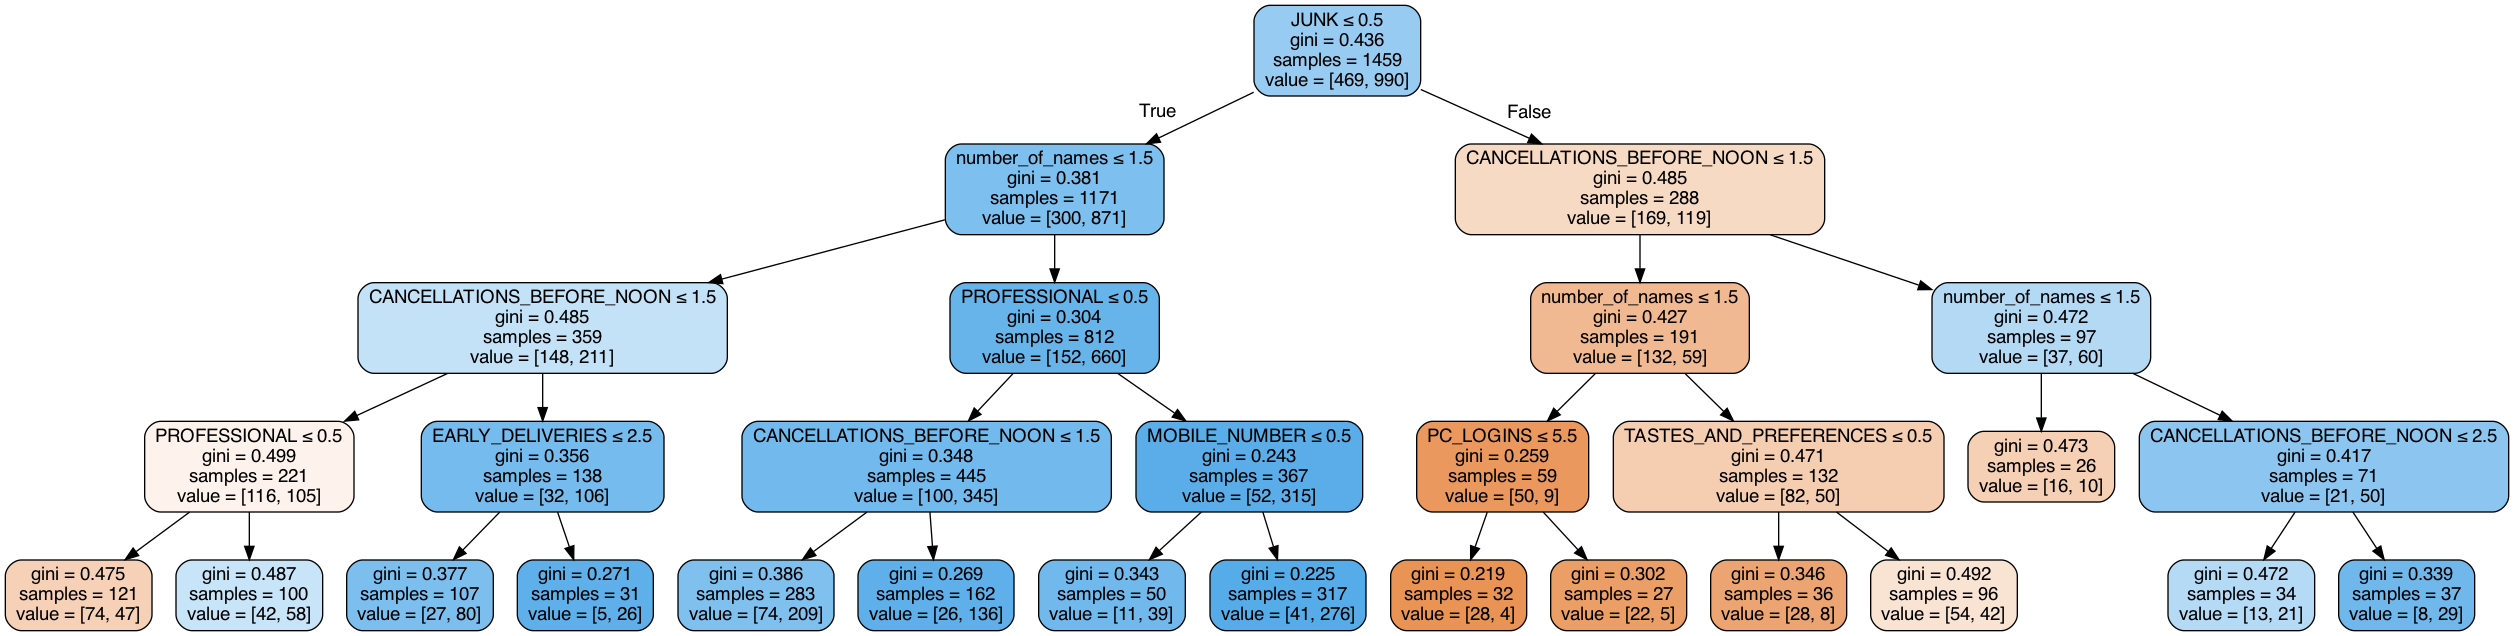

In [19]:
# calling display_tree
display_tree(tree       = pruned_tree_fit,
             feature_df = x_train)

<ipython-input-17-0c71b2e3d4a7>:63: FutureWarning: The pandas.np module is deprecated and will be removed from pandas in a future version. Import numpy directly instead
  plt.yticks(pd.np.arange(n_features), train.columns)


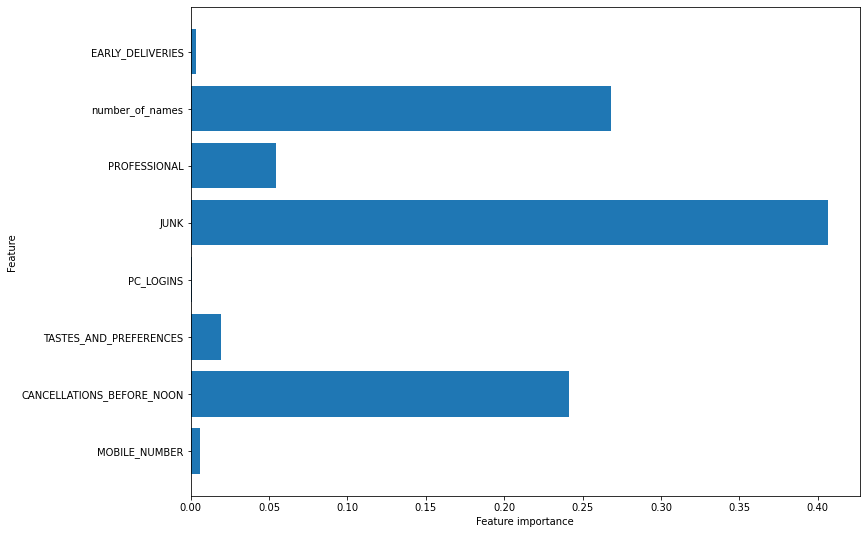

In [20]:
# plotting feature importance
plot_feature_importances(pruned_tree_fit,
                         train  = x_train,
                         export = False)

<pre>
<strong>Hyperparameter Tuning on Classification Trees</strong>
</pre>

In [21]:
# declaring a hyperparameter space
#criterion_space = ['gini', 'entropy']
#splitter_space  = ['best', 'random']
#depth_space     = np.arange(1, 10)
#min_space       = np.arange(2, 10)
#leaf_space      = np.arange(1,20)
#min_ispace      = np.arange(0, 1.0)


# creating a hyperparameter grid
#param_grid = {'criterion'        : criterion_space,
#              'splitter'         : splitter_space,
#              'max_depth'        : depth_space,
#              'min_samples_split': min_space,
#              'min_samples_leaf' : leaf_space,
#              'min_impurity_decrease': min_ispace}


# INSTANTIATING the model object without hyperparameters
#tuned_tree = DecisionTreeClassifier(random_state = 219)


# RandomizedSearchCV object
#tuned_tree_cv = RandomizedSearchCV(estimator             = tuned_tree,
#                                   param_distributions   = param_grid,
#                                   cv                    = 5,
#                                   n_iter                = 1000,
#                                   random_state          = 219,
#                                   scoring = make_scorer(roc_auc_score,
#                                             needs_threshold = False))


# FITTING to the FULL DATASET (due to cross-validation)
#tuned_tree_cv.fit(apprentice_data, apprentice_target)


# PREDICT step is not needed


# printing the optimal parameters and best score
#print("Tuned Parameters  :", tuned_tree_cv.best_params_)
#print("Tuned Training AUC:", tuned_tree_cv.best_score_.round(4))

In [22]:
# checking the best estimator for the model
#tuned_tree_cv.best_estimator_

In [23]:
# building a model based on hyperparameter tuning results

# train/test split with the logit_sig set
apprentice_data   =  apprentice.loc[ : , candidate_dict['logit_sig2']]
apprentice_target =  apprentice.loc[ : , 'CROSS_SELL_SUCCESS']


# train-test spliting
x_train, x_test, y_train, y_test = train_test_split(
            apprentice_data,
            apprentice_target,
            random_state = 219,
            test_size    = 0.25,
            stratify     = apprentice_target)


# INSTANTIATING a logistic regression model with tuned values
tree_tuned = DecisionTreeClassifier(criterion='gini',
                                    max_depth=3, 
                                    min_samples_leaf=13,
                                    random_state=219, 
                                    splitter='best',
                                    min_samples_split=17,
                                    min_weight_fraction_leaf =0,
                                    max_features = None, 
                                    max_leaf_nodes= None,
                                    min_impurity_decrease=0.0,
                                    class_weight=None,
                                    ccp_alpha=0.0
                                   )

# FIT
tree_tuned_fit = tree_tuned.fit(x_train, y_train)

# PREDICTING based on the testing set
tree_tuned_pred = tree_tuned.predict(x_test)


# SCORING the results
print('Training ACCURACY:', tree_tuned.score(x_train, y_train).round(4))
print('Testing  ACCURACY:', tree_tuned.score(x_test, y_test).round(4))
print('AUC Score        :', roc_auc_score(y_true  = y_test,
                                          y_score = tree_tuned_pred).round(4))


# saving scoring data for future use
tree_tuned_train_score = tree_tuned.score(x_train, y_train).round(4) # accuracy
tree_tuned_test_score  = tree_tuned.score(x_test, y_test).round(4)   # accuracy


# saving the AUC score
tree_tuned_auc         = roc_auc_score(y_true  = y_test,
                                     y_score = tree_tuned_pred).round(4) # auc
# unpacking the confusion matrix
tuned_tree_tn, \
tuned_tree_fp, \
tuned_tree_fn, \
tuned_tree_tp = confusion_matrix(y_true = y_test, y_pred = tree_tuned_pred).ravel()


# printing each result one-by-one
print(f"""
True Negatives : {tuned_tree_tn}
False Positives: {tuned_tree_fp}
False Negatives: {tuned_tree_fn}
True Positives : {tuned_tree_tp}
""")

Training ACCURACY: 0.7402
Testing  ACCURACY: 0.7762
AUC Score        : 0.732

True Negatives : 95
False Positives: 61
False Negatives: 48
True Positives : 283



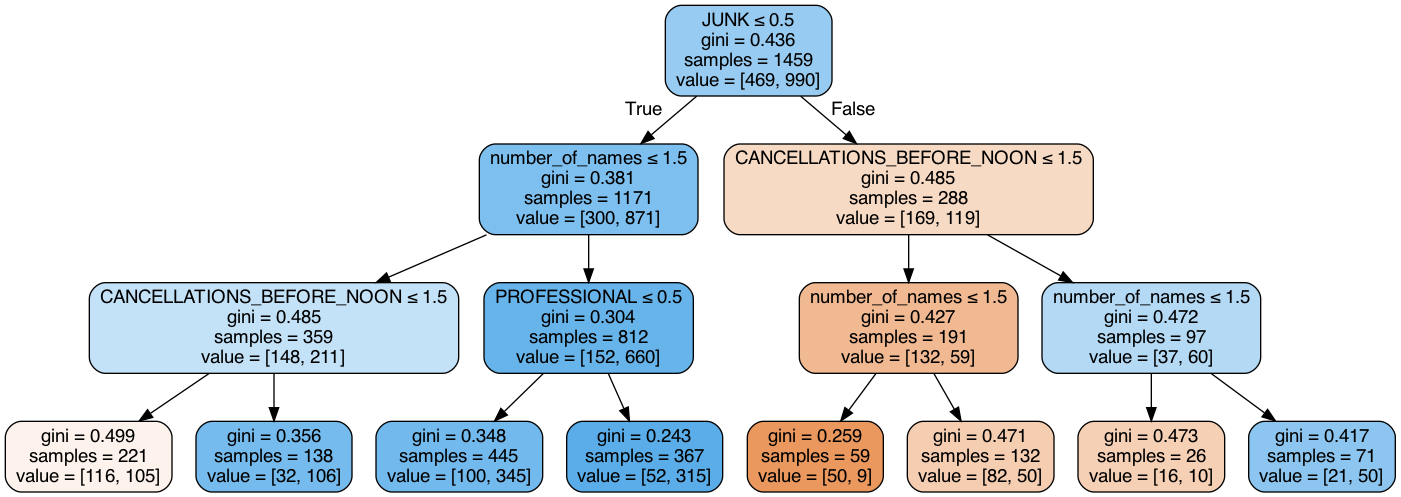

In [24]:
# displaying the tree
display_tree(tree = tree_tuned,
             feature_df = apprentice_data,
             height = 1500,
             width  = 1500)

In [25]:
# declaring model performance objects
tree_train_acc = tree_tuned.score(x_train, y_train).round(4)
tree_test_acc  = tree_tuned.score(x_test, y_test).round(4)
tree_auc       = roc_auc_score(y_true  = y_test,
                              y_score = tree_tuned_pred).round(4)


<pre>
<strong>Random Forest with hyperparameters using RandomizedSearchCV</strong>
</pre>

In [26]:
# declaring a hyperparameter space
#estimator_space  = np.arange(100, 2000, 250)
#leaf_space       = np.arange(1, 31, 10)
#depth_space     = np.arange(1, 8)
#min_space       = np.arange(2, 10)
#min_ispace      = np.arange(0, 1.0)
#criterion_space  = ['gini', 'entropy']
#bootstrap_space  = [True, False]
#warm_start_space = [True, False]
#feature_space = ['auto', 'sqrt', 'log2']


# creating a hyperparameter grid
#param_grid = {'n_estimators'     : estimator_space,
#              'min_samples_leaf' : leaf_space,
#              'criterion'        : criterion_space,
#              'bootstrap'        : bootstrap_space,
#              'max_depth'        : depth_space,
#              'min_samples_split': min_space,
#              'warm_start'       : warm_start_space,
#              'min_impurity_decrease': min_ispace,
#              'max_features': feature_space}

# INSTANTIATING the model object without hyperparameters
#forest_grid = RandomForestClassifier(random_state = 219)


# GridSearchCV object
#forest_cv = RandomizedSearchCV(estimator           = forest_grid,
#                               param_distributions = param_grid,
#                               cv         = 3,
#                               n_iter     = 96,
#                               scoring    = make_scorer(roc_auc_score,
#                                            needs_threshold = False))


# FITTING to the FULL DATASET (due to cross-validation)
#forest_cv.fit(apprentice_data, apprentice_target)


# PREDICT step is not needed


# printing the optimal parameters and best score
#print("Tuned Parameters  :", forest_cv.best_params_)
#print("Tuned Training AUC:", forest_cv.best_score_.round(4))

In [27]:
# best estimators based on RandomizedSearchCV
#forest_cv.best_estimator_

In [28]:
# building a model based on hyperparameter tuning results

# train/test split with the logit_sig set
apprentice_data   =  apprentice.loc[ : , candidate_dict['logit_sig2']]
apprentice_target =  apprentice.loc[ : , 'CROSS_SELL_SUCCESS']

# train-test spliting
x_train, x_test, y_train, y_test = train_test_split(
            apprentice_data,
            apprentice_target,
            random_state = 219,
            test_size    = 0.25,
            stratify     = apprentice_target)



# copy/pasting in the best_estimator_ results
# to avoid running another RandomizedSearch
forest_tuned = RandomForestClassifier(bootstrap=False, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=6, max_features='log2',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=21, min_samples_split=5,
                       min_weight_fraction_leaf=0.0, n_estimators=1350,
                       n_jobs=None, oob_score=False, random_state=219,
                       verbose=0, warm_start=True)


# FITTING the model object
forest_tuned_fit = forest_tuned.fit(x_train, y_train)


# PREDICTING based on the testing set
forest_tuned_pred = forest_tuned_fit.predict(x_test)

# SCORING the results
print('Forest Tuned Training ACCURACY:', forest_tuned.score(x_train, y_train).round(4))
print('Forest Tuned Testing  ACCURACY:', forest_tuned.score(x_test, y_test).round(4))
print('Forest Tuned AUC Score        :', roc_auc_score(y_true  = y_test,
                                                       y_score = forest_tuned_pred).round(4))


# saving scoring data for future use
forest_tuned_train_score = forest_tuned.score(x_train, y_train).round(4) # accuracy
forest_tuned_test_score  = forest_tuned.score(x_test, y_test).round(4)   # accuracy


# saving the AUC score
forest_tuned_auc = roc_auc_score(y_true  = y_test,
                                 y_score = forest_tuned_pred).round(4) # auc
# unpacking the confusion matrix
tuned_rf_tn, \
tuned_rf_fp, \
tuned_rf_fn, \
tuned_rf_tp = confusion_matrix(y_true = y_test, y_pred = forest_tuned_pred).ravel()


# printing each result one-by-one
print(f"""
True Negatives : {tuned_rf_tn}
False Positives: {tuned_rf_fp}
False Negatives: {tuned_rf_fn}
True Positives : {tuned_rf_tp}
""")

Forest Tuned Training ACCURACY: 0.7635
Forest Tuned Testing  ACCURACY: 0.7741
Forest Tuned AUC Score        : 0.7

True Negatives : 77
False Positives: 79
False Negatives: 31
True Positives : 300



<ipython-input-17-0c71b2e3d4a7>:63: FutureWarning: The pandas.np module is deprecated and will be removed from pandas in a future version. Import numpy directly instead
  plt.yticks(pd.np.arange(n_features), train.columns)


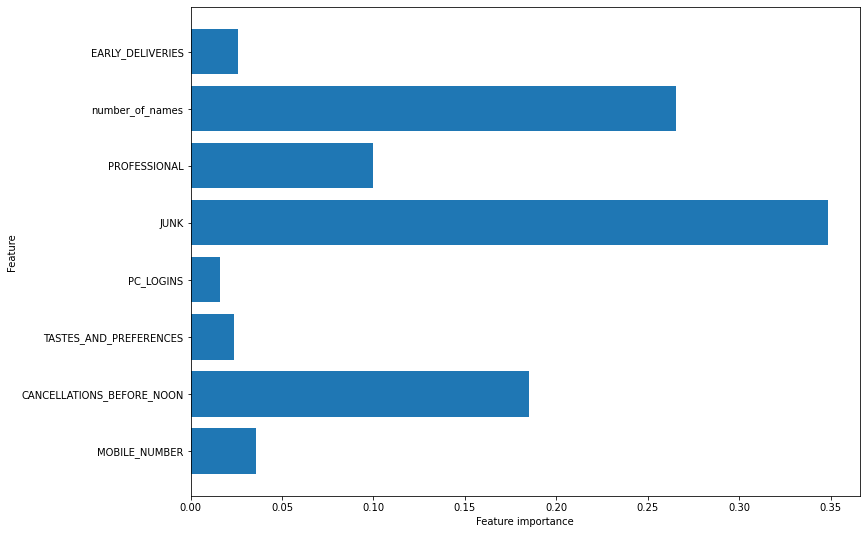

In [29]:
# plotting feature importances
plot_feature_importances(forest_tuned_fit,
                         train = x_train,
                         export = False)

In [30]:
# declaring model performance objects
tuned_rf_train_acc = forest_tuned_fit.score(x_train, y_train).round(4)
tuned_rf_test_acc  = forest_tuned_fit.score(x_test, y_test).round(4)
tuned_rf_auc       = roc_auc_score(y_true  = y_test,
                                   y_score = forest_tuned_pred).round(4)


In [31]:
# comparing results
print(f"""
Model         AUC Score      TN, FP, FN, TP
-----         ---------      --------------
Pruned Tree   {pruned_tree_auc_score}         {pruned_tree_tn, pruned_tree_fp, pruned_tree_fn, pruned_tree_tp}
Tuned Tree      {tree_tuned_auc}        {tuned_tree_tn, tuned_tree_fp, tuned_tree_fn, tuned_tree_tp}
Forest Tuned     {forest_tuned_auc}        {tuned_rf_tn, tuned_rf_fp, tuned_rf_fn, tuned_rf_tp}
""")


# creating a dictionary for model results
model_performance = {
    
    'Model Name'    : ['Pruned Tree', 'Tuned Tree', 'Forest Tuned'],
           
    'AUC Score' : [pruned_tree_auc_score, tree_tuned_auc, forest_tuned_auc],
    
    'Training Accuracy' : [pruned_tree_train_score, tree_tuned_train_score,
                           forest_tuned_train_score],
           
    'Testing Accuracy'  : [pruned_tree_test_score, tree_tuned_test_score,
                           forest_tuned_test_score],

    'Confusion Matrix'  : [(pruned_tree_tn, pruned_tree_fp, pruned_tree_fn, pruned_tree_tp),
                           (tuned_tree_tn, tuned_tree_fp, tuned_tree_fn, tuned_tree_tp),
                           (tuned_rf_tn, tuned_rf_fp, tuned_rf_fn, tuned_rf_tp)]}


# converting model_performance into a DataFrame
model_performance = pd.DataFrame(model_performance)


# sending model results to Excel
model_performance.to_excel('./classification_model_performance.xlsx',
                           index = False)


Model         AUC Score      TN, FP, FN, TP
-----         ---------      --------------
Pruned Tree   0.713         (82, 74, 33, 298)
Tuned Tree      0.732        (95, 61, 48, 283)
Forest Tuned     0.7        (77, 79, 31, 300)



In [32]:
model_performance

,Model Name,AUC Score,Training Accuracy,Testing Accuracy,Confusion Matrix
0,Pruned Tree,0.713,0.7512,0.7803,"(82, 74, 33, 298)"
1,Tuned Tree,0.732,0.7402,0.7762,"(95, 61, 48, 283)"
2,Forest Tuned,0.700,0.7635,0.7741,"(77, 79, 31, 300)"


<pre>
The winner model is the Tuned Tree, with an AUC Score of 0.732
</pre>